<center><p><script type="math/tex">X \cap Y</script> = {2, 3, a}</p><p> <script type="math/tex">X \cap Z</script> = {a}</p><p> <script type="math/tex">Y \cap Z</script> = {a, apple}</p><p> <script type="math/tex">X \cap Y \cap Z</script> = {a}<center>

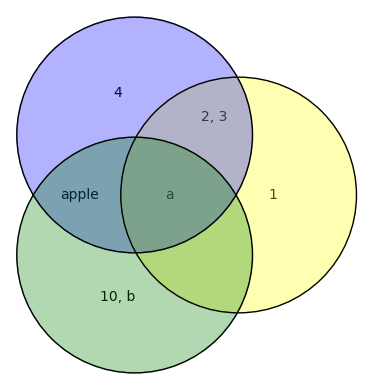

In [1]:
# from https://wiki.sagemath.org/interact/misc

def f(s, braces=True): 
    t = ', '.join(sorted(list(s)))
    if braces: return '{' + t + '}'
    return t
def g(s): return set(str(s).replace(',',' ').split())

@interact
def _(X='1,2,3,a', Y='2,a,3,4,apple', Z='a,b,10,apple'):
    S = [g(X), g(Y), g(Z)]
    X,Y,Z = S
    XY = X & Y
    XZ = X & Z
    YZ = Y & Z
    XYZ = XY & Z
    pretty_print(html("<center><p>$X \\cap Y$ = {}</p><p> $X \\cap Z$ = {}</p><p> $Y \\cap Z$ = {}</p><p> $X \\cap Y \\cap Z$ = {}<center>".format(f(XY),f(XZ),f(YZ),f(XYZ))))
    centers = [(cos(n*2*pi/3), sin(n*2*pi/3)) for n in [0,1,2]]
    scale = 1.7
    clr = ['yellow', 'blue', 'green']
    G = Graphics()
    for i in range(len(S)):
        G += circle(centers[i], scale, rgbcolor=clr[i], 
             fill=True, alpha=0.3)
    for i in range(len(S)):
        G += circle(centers[i], scale, rgbcolor='black')

    # Plot what is in one but neither other
    for i in range(len(S)):
        Z = set(S[i])
        for j in range(1,len(S)):
            Z = Z.difference(S[(i+j)%3])
        G += text(f(Z,braces=False), (1.5*centers[i][0],1.7*centers[i][1]), rgbcolor='black')


    # Plot pairs of intersections
    for i in range(len(S)):
        Z = (set(S[i]) & S[(i+1)%3]) - set(XYZ)
        C = (1.3*cos(i*2*pi/3 + pi/3), 1.3*sin(i*2*pi/3 + pi/3))
        G += text(f(Z,braces=False), C, rgbcolor='black')

    # Plot intersection of all three
    G += text(f(XYZ,braces=False), (0,0), rgbcolor='black')

    # Show it
    G.show(aspect_ratio=1, axes=False)